# recognition of tamil actors using pca and svm

# a1-import system libraries

In [7]:
import os 
import warnings
warnings.simplefilter('ignore')

In [8]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [11]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

In [12]:
vijay=os.listdir("vijay face")

In [13]:
vijay

['V1.jpg',
 'V10.jpg',
 'V2.jpg',
 'V3.jpg',
 'V4.jpg',
 'V5.jpg',
 'V6.jpg',
 'V7.jpg',
 'V8.jpg',
 'V9.jpg']

In [14]:
hr = os.listdir("hr face")

In [15]:
hr

['HR1.jpg',
 'HR10.jpeg',
 'HR2.jpg',
 'HR3.jpg',
 'HR4.jpg',
 'HR5.jpg',
 'HR6.jpg',
 'HR7.jpg',
 'HR8.jpeg',
 'HR9.jpg']

In [16]:
sk = os.listdir("sk face")

In [17]:
sk

['SK1.jpg',
 'SK10.jpg',
 'SK2.jpg',
 'SK3.jpg',
 'SK4.jpg',
 'SK5.jpg',
 'SK6.jpg',
 'SK7.jpg',
 'SK8.jpg',
 'SK9.jpg']

In [18]:
limit = 10
vi_img=[None]*limit
vi_gray=[None]*limit
vi_resize=[None]*limit
j=0
for i in vijay:
    if(j<limit):
        vi_img[j]=imread("vijay face/"+i)
        vi_gray[j]=rgb2gray(vi_img[j])
        vi_gray[j]=resize(vi_gray[j],(512,512))
        j+=1
    else:
        break

In [19]:
sk_img=[None]*limit
sk_gray=[None]*limit
sk_resize=[None]*limit
j=0
for i in sk:
    if(j<limit):
        sk_img[j]=imread("sk face/"+i)
        sk_gray[j]=rgb2gray(sk_img[j])
        sk_gray[j]=resize(sk_gray[j],(512,512))
        j+=1
    else:
        break

In [20]:
hr_img=[None]*limit
hr_gray=[None]*limit
hr_resize=[None]*limit
j=0
for i in hr:
    if(j<limit):
        hr_img[j]=imread("hr face/"+i)
        hr_gray[j]=rgb2gray(hr_img[j])
        hr_gray[j]=resize(hr_gray[j],(512,512))
        j+=1
    else:
        break

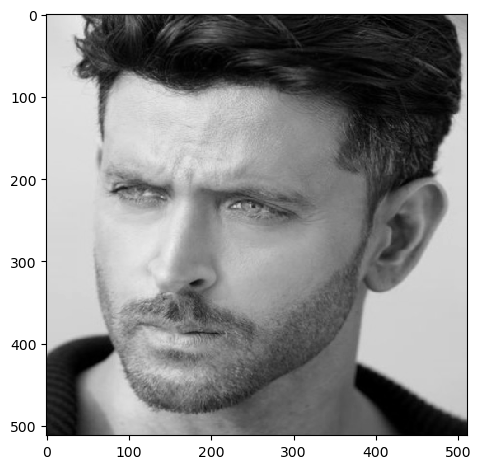

In [21]:
imshow(hr_gray[2])

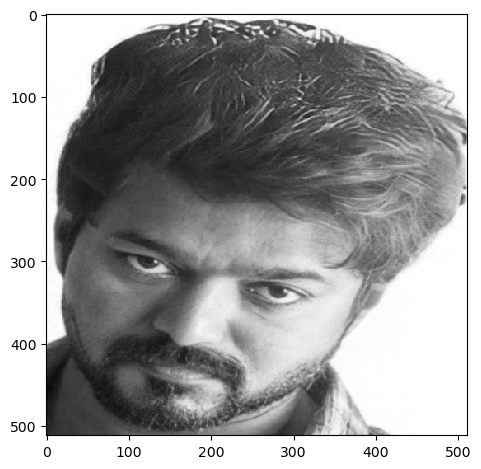

In [22]:
imshow(vi_gray[9])

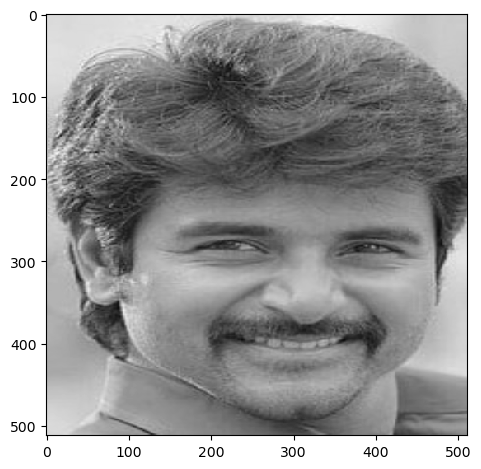

In [23]:
imshow(sk_gray[1])

In [24]:
vi_gray

[array([[0.76767843, 0.76948856, 0.76857204, ..., 0.77525373, 0.77525373,
         0.77525373],
        [0.76770655, 0.76773775, 0.76770772, ..., 0.77525373, 0.77525373,
         0.77525373],
        [0.77098413, 0.76766856, 0.76767356, ..., 0.77525373, 0.77525373,
         0.77525373],
        ...,
        [0.32087444, 0.29308054, 0.28058483, ..., 0.54046926, 0.51342679,
         0.5193051 ],
        [0.29794189, 0.26381307, 0.22926369, ..., 0.60246493, 0.5719562 ,
         0.56807129],
        [0.23194652, 0.22224242, 0.1980839 , ..., 0.63008778, 0.59386631,
         0.58949835]]),
 array([[0.61407395, 0.61766191, 0.61790723, ..., 0.59840433, 0.60192039,
         0.60192039],
        [0.61797804, 0.61810567, 0.62054917, ..., 0.60193318, 0.60205826,
         0.60205826],
        [0.62118845, 0.62460624, 0.6250202 , ..., 0.60228421, 0.60584196,
         0.60584196],
        ...,
        [0.5568677 , 0.57680553, 0.6067709 , ..., 0.97254902, 0.97254902,
         0.97254902],
        [0.5

In [29]:
len_of_images_vi=len(vi_gray)

In [30]:
len_of_images_vi

10

In [31]:
images_size_vi=vi_gray[2].shape

In [32]:
images_size_vi

(512, 512)

In [33]:
flatten_size_vi=images_size_vi[0]*images_size_vi[1]

In [34]:
flatten_size_vi

262144

In [35]:
for i in range(len_of_images_vi):
    vi_gray[i]=np.ndarray.flatten(vi_gray[i]).reshape(flatten_size_vi,1)

In [36]:
vi_gray=np.dstack(vi_gray)

In [37]:
vi_gray.shape

(262144, 1, 10)

In [38]:
vi_gray=np.rollaxis(vi_gray,axis=2,start=0)

In [39]:
vi_gray.shape

(10, 262144, 1)

In [40]:
vi_gray=vi_gray.reshape(len_of_images_vi,flatten_size_vi)

In [41]:
vi_gray.shape

(10, 262144)

In [42]:
vi_dataframe=pd.DataFrame(vi_gray)

In [43]:
vi_dataframe["label"]="vi"

In [44]:
vi_dataframe

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.767678,0.769489,0.768572,0.767678,0.767678,0.770405,0.771611,0.770367,0.767672,0.770111,...,0.732373,0.719215,0.649608,0.617774,0.620580,0.619219,0.630088,0.593866,0.589498,vi
1,0.614074,0.617662,0.617907,0.616931,0.620013,0.620697,0.620706,0.623503,0.624582,0.624582,...,0.974521,0.974521,0.974521,0.974521,0.974521,0.974265,0.972549,0.972549,0.972549,vi
2,0.443078,0.443245,0.444883,0.447341,0.448841,0.448913,0.446111,0.443246,0.443020,0.443020,...,0.466835,0.463978,0.464712,0.467574,0.470592,0.473610,0.474547,0.474678,0.474678,vi
3,0.719911,0.718360,0.713860,0.710755,0.706396,0.699785,0.696261,0.694041,0.691490,0.687779,...,0.928715,0.932407,0.930508,0.928999,0.928999,0.930519,0.932886,0.935253,0.936065,vi
4,0.060522,0.059625,0.059265,0.059194,0.057479,0.056356,0.055950,0.056087,0.056531,0.058041,...,0.157585,0.154587,0.149505,0.144608,0.141577,0.138522,0.135507,0.131811,0.128680,vi
5,0.237138,0.234702,0.230526,0.227780,0.227801,0.227823,0.229361,0.228550,0.226102,0.224479,...,0.539431,0.531644,0.522630,0.515003,0.508875,0.498685,0.486644,0.475843,0.470283,vi
6,0.561940,0.556595,0.561046,0.573250,0.580383,0.577182,0.565252,0.554192,0.547960,0.539853,...,0.696857,0.713077,0.721245,0.722560,0.729206,0.733713,0.742183,0.750756,0.757797,vi
7,0.167854,0.169968,0.172986,0.175141,0.174726,0.174706,0.172737,0.171843,0.174684,0.174702,...,0.135490,0.135490,0.135490,0.135490,0.135490,0.135490,0.133217,0.131546,0.131546,vi
8,0.758270,0.758270,0.758270,0.758270,0.758270,0.757778,0.757705,0.757705,0.763795,0.767052,...,0.518712,0.521852,0.521255,0.517425,0.513479,0.509629,0.517289,0.524810,0.528548,vi
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,vi


In [45]:
len_of_images_sk=len(sk_gray)

In [46]:
len_of_images_sk

10

In [47]:
images_size_sk=sk_gray[2].shape

In [48]:
images_size_sk

(512, 512)

In [49]:
flatten_size_sk=images_size_sk[0]*images_size_sk[1]

In [50]:
flatten_size_sk

262144

In [51]:
for i in range(len_of_images_sk):
    sk_gray[i]=np.ndarray.flatten(sk_gray[i]).reshape(flatten_size_sk,1)

In [52]:
sk_gray=np.dstack(sk_gray)

In [53]:
sk_gray.shape

(262144, 1, 10)

In [54]:
sk_gray=np.rollaxis(sk_gray,axis=2,start=0)

In [55]:
sk_gray.shape

(10, 262144, 1)

In [56]:
sk_gray=sk_gray.reshape(len_of_images_sk,flatten_size_sk)

In [57]:
sk_gray.shape

(10, 262144)

In [58]:
sk_dataframe=pd.DataFrame(sk_gray)

In [59]:
sk_dataframe["label"]="sk"

In [60]:
sk_dataframe

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.732741,0.733831,0.736264,0.739205,0.741118,0.743317,0.746415,0.748756,0.752602,0.754914,...,0.155879,0.155879,0.155878,0.155877,0.155877,0.155877,0.155877,0.155877,0.155877,sk
1,0.854857,0.854857,0.854857,0.854857,0.853364,0.851725,0.851058,0.851295,0.851708,0.853347,...,0.526168,0.528577,0.530882,0.532609,0.533712,0.534894,0.536885,0.538877,0.538095,sk
2,0.802670,0.802670,0.802670,0.802670,0.802670,0.802670,0.802670,0.802670,0.802670,0.802670,...,0.476616,0.497779,0.522921,0.533040,0.525568,0.499467,0.452533,0.409185,0.385339,sk
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.797605,0.846186,0.850178,0.878284,0.828704,0.871822,0.902937,0.921507,0.943339,sk
4,0.417715,0.416949,0.418527,0.420105,0.420636,0.420857,0.420563,0.418986,0.417408,0.416868,...,0.128522,0.102873,0.077224,0.077249,0.087578,0.092938,0.081490,0.070041,0.075599,sk
5,0.216703,0.216703,0.216703,0.219137,0.218274,0.217592,0.217592,0.217592,0.217592,0.218901,...,0.371374,0.366921,0.365081,0.353505,0.335940,0.317392,0.345218,0.344012,0.349613,sk
6,0.408338,0.408683,0.411023,0.420880,0.427629,0.432845,0.442887,0.451867,0.459860,0.460733,...,0.098494,0.098067,0.096521,0.093771,0.093189,0.092941,0.092973,0.095843,0.097396,sk
7,0.851863,0.851863,0.851863,0.851863,0.850835,0.849663,0.849033,0.849033,0.849049,0.849405,...,0.578255,0.578114,0.578114,0.578987,0.580611,0.582035,0.582035,0.582035,0.582035,sk
8,0.942462,0.942462,0.942462,0.942515,0.944491,0.944677,0.943719,0.943564,0.943564,0.943564,...,0.587339,0.580297,0.578102,0.583197,0.570155,0.570352,0.663468,0.838991,0.982135,sk
9,0.115579,0.115579,0.115526,0.115014,0.115014,0.112538,0.110809,0.113413,0.115019,0.114931,...,0.063080,0.062697,0.061581,0.068050,0.069931,0.065493,0.063805,0.064115,0.068717,sk


In [61]:
len_of_images_hr=len(hr_gray)

In [62]:
len_of_images_hr

10

In [63]:
images_size_hr=hr_gray[2].shape

In [64]:
images_size_hr

(512, 512)

In [65]:
flatten_size_hr=images_size_hr[0]*images_size_hr[1]

In [66]:
flatten_size_hr

262144

In [67]:
for i in range(len_of_images_hr):
    hr_gray[i]=np.ndarray.flatten(hr_gray[i]).reshape(flatten_size_hr,1)

In [68]:
hr_gray=np.dstack(hr_gray)

In [69]:
hr_gray.shape

(262144, 1, 10)

In [70]:
hr_gray=np.rollaxis(hr_gray,axis=2,start=0)

In [71]:
hr_gray.shape

(10, 262144, 1)

In [72]:
hr_gray=hr_gray.reshape(len_of_images_hr,flatten_size_hr)

In [73]:
hr_gray.shape

(10, 262144)

In [74]:
hr_dataframe=pd.DataFrame(hr_gray)

In [75]:
hr_dataframe["label"]="hr"

In [76]:
hr_dataframe

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.085551,0.085551,0.078528,0.074216,0.070382,0.066844,0.073029,0.077680,0.081487,0.082463,...,0.196580,0.194617,0.194085,0.193924,0.201021,0.206263,0.209977,0.215565,0.218185,hr
1,0.860023,0.860544,0.862765,0.866879,0.871129,0.873351,0.874860,0.874860,0.874860,0.874860,...,0.560720,0.567334,0.569555,0.562170,0.550251,0.543877,0.538236,0.533793,0.532752,hr
2,0.844640,0.841974,0.841032,0.842997,0.846600,0.849893,0.853187,0.856468,0.854759,0.854408,...,0.042375,0.046511,0.052989,0.052989,0.050176,0.049077,0.049296,0.048695,0.046040,hr
3,0.116938,0.116938,0.116938,0.116938,0.116938,0.116938,0.116938,0.117915,0.119753,0.116938,...,0.251834,0.255472,0.256311,0.253557,0.246739,0.245650,0.248740,0.255948,0.249141,hr
4,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997043,0.996945,...,0.115083,0.127460,0.142025,0.151131,0.161565,0.166874,0.162701,0.159395,0.156238,hr
5,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,...,0.363557,0.377754,0.342689,0.290422,0.247410,0.227773,0.222693,0.233441,0.243657,hr
6,0.756105,0.756105,0.756105,0.756105,0.756105,0.756105,0.756105,0.756105,0.755262,0.753087,...,0.925016,0.927563,0.931721,0.931062,0.929301,0.931319,0.933774,0.937931,0.938751,hr
7,0.570097,0.590677,0.678445,0.796018,0.910713,0.939910,0.960062,0.961054,0.960145,0.957711,...,0.562428,0.559117,0.554447,0.549777,0.545107,0.566823,0.589416,0.602743,0.605868,hr
8,0.630062,0.626349,0.623277,0.623277,0.623277,0.623277,0.626177,0.623277,0.623277,0.623277,...,0.687456,0.688613,0.692534,0.693338,0.696456,0.694518,0.690030,0.688613,0.688613,hr
9,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,...,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,hr


# concate

In [77]:
actor_1=pd.concat([vi_dataframe,sk_dataframe])

In [78]:
actor=pd.concat([actor_1,hr_dataframe])

In [79]:
actor

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.767678,0.769489,0.768572,0.767678,0.767678,0.770405,0.771611,0.770367,0.767672,0.770111,...,0.732373,0.719215,0.649608,0.617774,0.620580,0.619219,0.630088,0.593866,0.589498,vi
1,0.614074,0.617662,0.617907,0.616931,0.620013,0.620697,0.620706,0.623503,0.624582,0.624582,...,0.974521,0.974521,0.974521,0.974521,0.974521,0.974265,0.972549,0.972549,0.972549,vi
2,0.443078,0.443245,0.444883,0.447341,0.448841,0.448913,0.446111,0.443246,0.443020,0.443020,...,0.466835,0.463978,0.464712,0.467574,0.470592,0.473610,0.474547,0.474678,0.474678,vi
3,0.719911,0.718360,0.713860,0.710755,0.706396,0.699785,0.696261,0.694041,0.691490,0.687779,...,0.928715,0.932407,0.930508,0.928999,0.928999,0.930519,0.932886,0.935253,0.936065,vi
4,0.060522,0.059625,0.059265,0.059194,0.057479,0.056356,0.055950,0.056087,0.056531,0.058041,...,0.157585,0.154587,0.149505,0.144608,0.141577,0.138522,0.135507,0.131811,0.128680,vi
5,0.237138,0.234702,0.230526,0.227780,0.227801,0.227823,0.229361,0.228550,0.226102,0.224479,...,0.539431,0.531644,0.522630,0.515003,0.508875,0.498685,0.486644,0.475843,0.470283,vi
6,0.561940,0.556595,0.561046,0.573250,0.580383,0.577182,0.565252,0.554192,0.547960,0.539853,...,0.696857,0.713077,0.721245,0.722560,0.729206,0.733713,0.742183,0.750756,0.757797,vi
7,0.167854,0.169968,0.172986,0.175141,0.174726,0.174706,0.172737,0.171843,0.174684,0.174702,...,0.135490,0.135490,0.135490,0.135490,0.135490,0.135490,0.133217,0.131546,0.131546,vi
8,0.758270,0.758270,0.758270,0.758270,0.758270,0.757778,0.757705,0.757705,0.763795,0.767052,...,0.518712,0.521852,0.521255,0.517425,0.513479,0.509629,0.517289,0.524810,0.528548,vi
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,vi


In [80]:
from sklearn.utils import shuffle

In [81]:
kollywood_indexed=shuffle(actor).reset_index()

In [82]:
kollywood_indexed

,index,0,1,2,3,4,5,6,7,8,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,2,0.844640,0.841974,0.841032,0.842997,0.846600,0.849893,0.853187,0.856468,0.854759,...,0.042375,0.046511,0.052989,0.052989,0.050176,0.049077,0.049296,0.048695,0.046040,hr
1,4,0.060522,0.059625,0.059265,0.059194,0.057479,0.056356,0.055950,0.056087,0.056531,...,0.157585,0.154587,0.149505,0.144608,0.141577,0.138522,0.135507,0.131811,0.128680,vi
2,2,0.443078,0.443245,0.444883,0.447341,0.448841,0.448913,0.446111,0.443246,0.443020,...,0.466835,0.463978,0.464712,0.467574,0.470592,0.473610,0.474547,0.474678,0.474678,vi
3,7,0.167854,0.169968,0.172986,0.175141,0.174726,0.174706,0.172737,0.171843,0.174684,...,0.135490,0.135490,0.135490,0.135490,0.135490,0.135490,0.133217,0.131546,0.131546,vi
4,4,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997043,...,0.115083,0.127460,0.142025,0.151131,0.161565,0.166874,0.162701,0.159395,0.156238,hr
5,3,0.719911,0.718360,0.713860,0.710755,0.706396,0.699785,0.696261,0.694041,0.691490,...,0.928715,0.932407,0.930508,0.928999,0.928999,0.930519,0.932886,0.935253,0.936065,vi
6,9,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,...,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,hr
7,5,0.216703,0.216703,0.216703,0.219137,0.218274,0.217592,0.217592,0.217592,0.217592,...,0.371374,0.366921,0.365081,0.353505,0.335940,0.317392,0.345218,0.344012,0.349613,sk
8,5,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,...,0.363557,0.377754,0.342689,0.290422,0.247410,0.227773,0.222693,0.233441,0.243657,hr
9,6,0.561940,0.556595,0.561046,0.573250,0.580383,0.577182,0.565252,0.554192,0.547960,...,0.696857,0.713077,0.721245,0.722560,0.729206,0.733713,0.742183,0.750756,0.757797,vi


In [83]:
kollywood_actors=kollywood_indexed.drop(['index'],axis=1)

In [84]:
kollywood_actors

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,label
0,0.844640,0.841974,0.841032,0.842997,0.846600,0.849893,0.853187,0.856468,0.854759,0.854408,...,0.042375,0.046511,0.052989,0.052989,0.050176,0.049077,0.049296,0.048695,0.046040,hr
1,0.060522,0.059625,0.059265,0.059194,0.057479,0.056356,0.055950,0.056087,0.056531,0.058041,...,0.157585,0.154587,0.149505,0.144608,0.141577,0.138522,0.135507,0.131811,0.128680,vi
2,0.443078,0.443245,0.444883,0.447341,0.448841,0.448913,0.446111,0.443246,0.443020,0.443020,...,0.466835,0.463978,0.464712,0.467574,0.470592,0.473610,0.474547,0.474678,0.474678,vi
3,0.167854,0.169968,0.172986,0.175141,0.174726,0.174706,0.172737,0.171843,0.174684,0.174702,...,0.135490,0.135490,0.135490,0.135490,0.135490,0.135490,0.133217,0.131546,0.131546,vi
4,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997433,0.997043,0.996945,...,0.115083,0.127460,0.142025,0.151131,0.161565,0.166874,0.162701,0.159395,0.156238,hr
5,0.719911,0.718360,0.713860,0.710755,0.706396,0.699785,0.696261,0.694041,0.691490,0.687779,...,0.928715,0.932407,0.930508,0.928999,0.928999,0.930519,0.932886,0.935253,0.936065,vi
6,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,0.806451,...,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,0.810924,hr
7,0.216703,0.216703,0.216703,0.219137,0.218274,0.217592,0.217592,0.217592,0.217592,0.218901,...,0.371374,0.366921,0.365081,0.353505,0.335940,0.317392,0.345218,0.344012,0.349613,sk
8,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,0.240129,...,0.363557,0.377754,0.342689,0.290422,0.247410,0.227773,0.222693,0.233441,0.243657,hr
9,0.561940,0.556595,0.561046,0.573250,0.580383,0.577182,0.565252,0.554192,0.547960,0.539853,...,0.696857,0.713077,0.721245,0.722560,0.729206,0.733713,0.742183,0.750756,0.757797,vi


In [85]:
kollywood_actors.to_csv("actor.csv")

In [86]:
x=kollywood_actors.values[:,:-1]

In [87]:
y=kollywood_actors.values[:,-1]

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [90]:
x_train.shape

(15, 262144)

In [91]:
x_test.shape

(15, 262144)

In [92]:
from sklearn import decomposition

# pca

In [93]:
pca=decomposition.PCA(n_components=15, whiten=True, random_state=1)

In [94]:
pca.fit(x_train)

PCA(n_components=15, random_state=1, whiten=True)

In [95]:
x_train_pca= pca.transform(x_train)
x_test_pca= pca.transform(x_test)

In [96]:
x_train_pca.shape

(15, 15)

In [97]:
x_test_pca.shape

(15, 15)

In [98]:
eigen=(np.reshape(x[10],(512,512)).astype(np.float64))

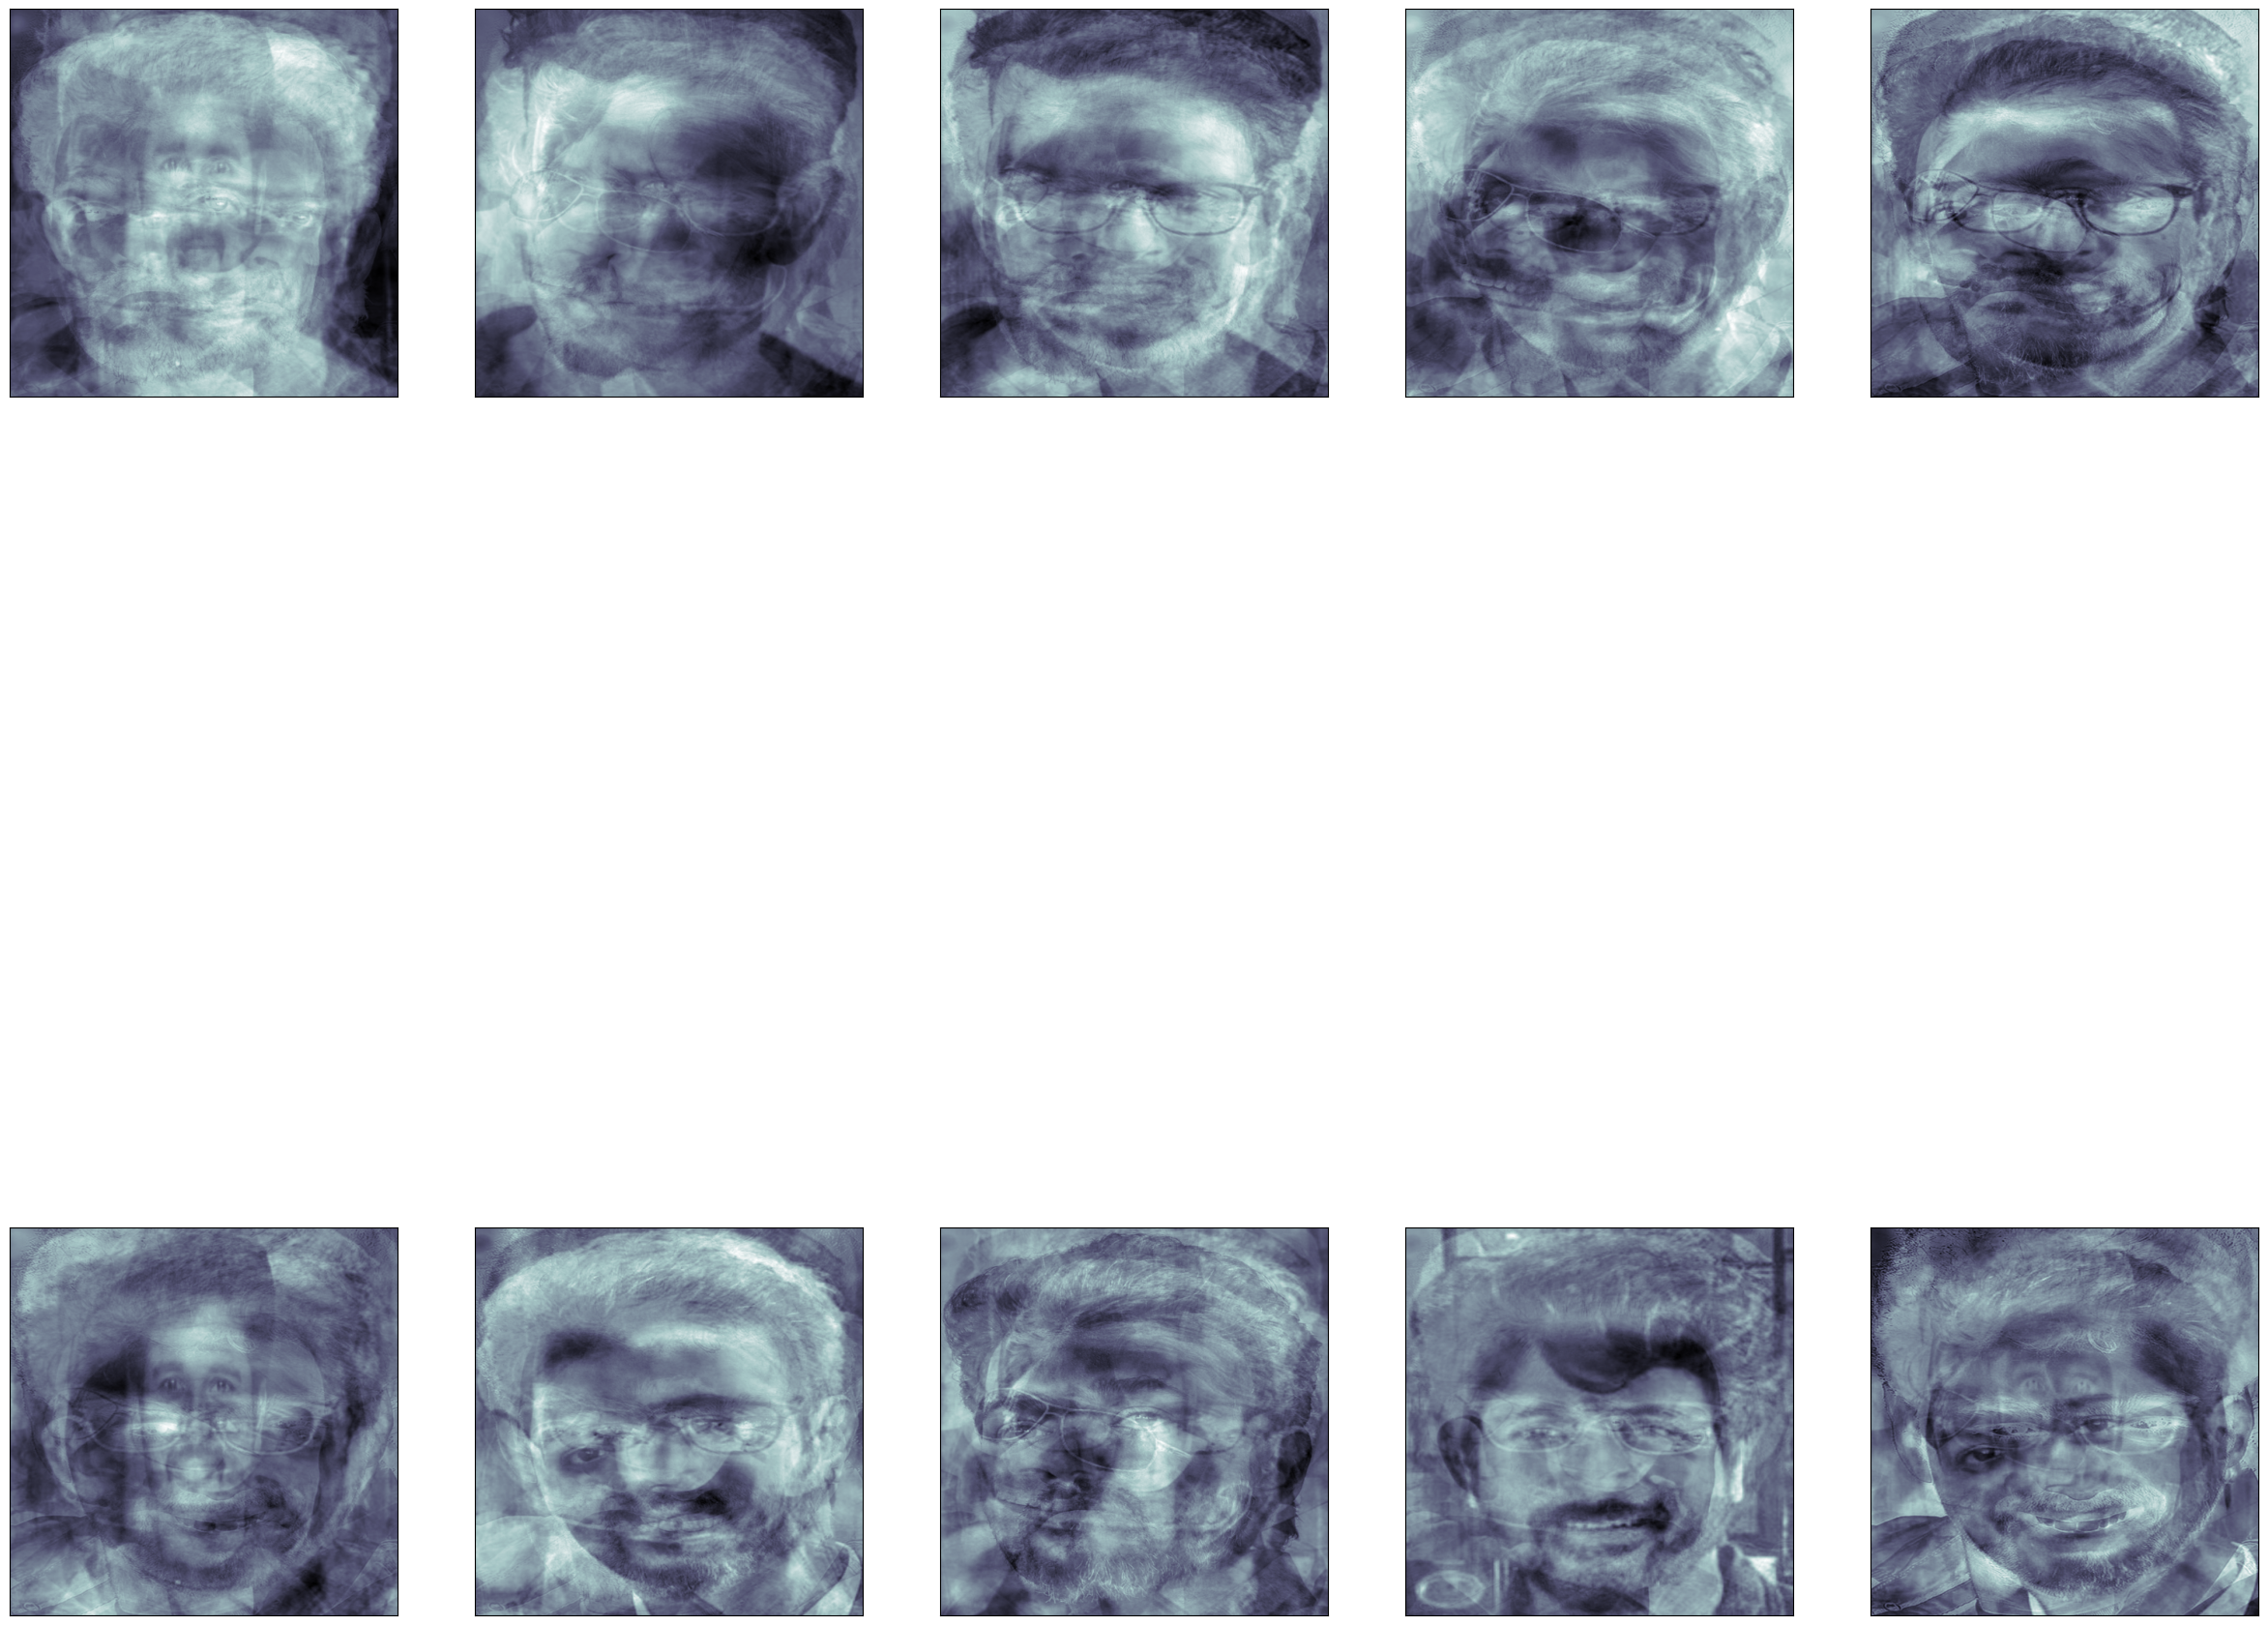

In [99]:
fig = plt.figure(figsize=(30,30))
for i in range(10):
    ax = fig.add_subplot(2, 5,i+1,xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=plt.cm.bone)

In [100]:
from sklearn import svm

In [101]:
clf = svm.SVC(C=2, gamma=0.006, kernel="rbf")
clf.fit(x_train_pca, y_train)

SVC(C=2, gamma=0.006)

In [102]:
y_pred = clf.predict(x_test_pca)

In [103]:
y_pred

array(['vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi', 'vi',
       'vi', 'vi', 'vi', 'vi'], dtype=object)

In [ ]:
for i in (np.random.randit(0,3,3))
